In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [14]:
dataframe = pd.read_csv('ionosphere.data')

In [16]:
dataframe.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [15]:
dataframe.isnull().any()

1            False
0            False
0.99539      False
-0.05889     False
0.85243      False
0.02306      False
0.83398      False
-0.37708     False
1.1          False
0.03760      False
0.85243.1    False
-0.17755     False
0.59755      False
-0.44945     False
0.60536      False
-0.38223     False
0.84356      False
-0.38542     False
0.58212      False
-0.32192     False
0.56971      False
-0.29674     False
0.36946      False
-0.47357     False
0.56811      False
-0.51171     False
0.41078      False
-0.46168     False
0.21266      False
-0.34090     False
0.42267      False
-0.54487     False
0.18641      False
-0.45300     False
g            False
dtype: bool

In [17]:
dataframe['g'].value_counts()

g    224
b    126
Name: g, dtype: int64

In [18]:
pd.set_option('display.max_rows', 10000000000)
pd.set_option('display.max_columns', 10000000000)
pd.set_option('display.width', 95)

In [20]:
dataframe.shape

(350, 35)

In [22]:
features = dataframe.iloc[:, :34]
target = dataframe.iloc[:, -1]

In [23]:
features.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,0.85243.1,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,0.00000,0.00000,-0.04572,-0.15540,-0.00343,-0.10196,-0.11575,-0.05414,0.01838,0.03669,0.01519,0.00888,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011


In [24]:
features_matrix_standardized = StandardScaler().fit_transform(features)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features_matrix_standardized, target, test_size=0.2)

In [32]:
model = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, fit_intercept=True,
intercept_scaling=1, class_weight=None,
random_state=None, solver='lbfgs',
max_iter=100, multi_class='auto',
verbose=0, warm_start=False, n_jobs=None,
l1_ratio=None)

In [33]:
Logistic_reg_model = model.fit(x_train, y_train)

In [34]:
predictions = Logistic_reg_model.predict(x_test)

Text(0.5, 1.0, 'Accuracy score: 0.9428571428571428')

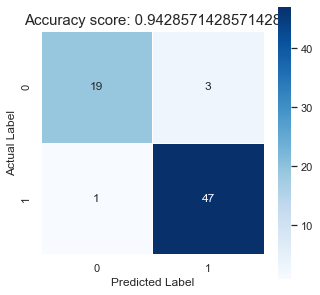

In [38]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidth=0.5, annot=True, square=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy score: {0}'.format(Logistic_reg_model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)